In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

## Constants

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

#### Using image_dataset_from_directory API to load the the images

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantImages",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names

In [7]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
len(dataset)

68

## Visualizations

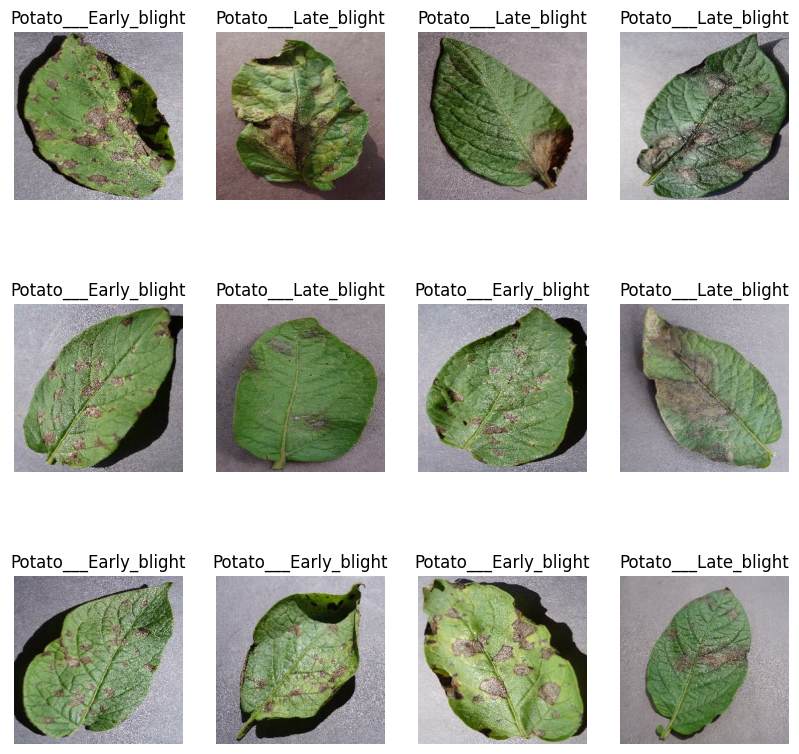

In [10]:
plt.figure(figsize =(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax =plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")


In [11]:
len(dataset)

68

#### Function to split the dataset

80% ==> training

20% ==> 10% validation, 10% test


In [13]:
train_size = 0.8
len(dataset)*train_size


54.400000000000006

In [14]:
train_ds = dataset.take(54) 
len(train_ds)

54

In [15]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [16]:
val_size =0.1
len(dataset)*val_size

6.800000000000001

In [17]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [18]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [19]:
## FUNCTION

def get_dataset_partitions_tf(ds, train_split = 0.8, val_split=0.1,test_split=0.1, shuffle = True, shuffle_size=10000):

    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    
    return train_ds,val_ds,test_ds

In [20]:
train_ds , val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [21]:
len(train_ds)

54

In [22]:
len(val_ds)

6

In [23]:
len(test_ds)

8

#### Cache, Shuffle, and Prefetch the Dataset

In [25]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## Building the Model

In [27]:
## Normalizing
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  
    layers.Rescaling(1./255), 
])

#### Data Augmentation
--to deal with rotated images

In [29]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [30]:
'''
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)
'''

"\ninput_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)\nn_classes = 3\n\nmodel = models.Sequential([\n    resize_and_rescale,\n    data_augmentation,\n    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),\n    layers.MaxPooling2D((2, 2)),\n    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),\n    layers.MaxPooling2D((2, 2)),\n    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),\n    layers.MaxPooling2D((2, 2)),\n    layers.Conv2D(64, (3, 3), activation='relu'),\n    layers.MaxPooling2D((2, 2)),\n    layers.Conv2D(64, (3, 3), activation='relu'),\n    layers.MaxPooling2D((2, 2)),\n    layers.Conv2D(64, (3, 3), activation='relu'),\n    layers.MaxPooling2D((2, 2)),\n    layers.Flatten(),\n    layers.Dense(64, activation='relu'),\n    layers.Dense(n_classes, activation='softmax'),\n])\n\nmodel.build(input_shape=input_shape)\n"